####  This file explores our sentiment analysis using a Bag of Words approach using a NN to build our model
#### Results: Increase in the Amazon dataset but overall similar to our baseline of BOW w/ Logistic Regression

In [2]:
import pandas as pd 
import util
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import layers
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
df = util.get_full_data_frame()

In [4]:
df_yelp = df[df['source'] == 'yelp']
sentences = df_yelp['sentence'].values
y = df_yelp['label'].values

sentences_train,sentences_test,y_train,y_test = train_test_split(sentences,y,test_size=0.25,random_state=1000)

print('Training set: {} '.format(len(sentences_train)))
print('Testing set: {} '.format(len(sentences_test)))

Training set: 750 
Testing set: 250 


In [5]:
# we will create our vocabulary using only the training set
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

#then we create our feature vectors for every sentence. NOTE: scikit takes care of lots of preprocessing for us by
#tokenizing sentences (removing punctuation, special characters....)
#this is one of our HYPER PERAMETERS, we can change how we tokenize
X_train = vectorizer.transform(sentences_train)
X_test =  vectorizer.transform(sentences_test)

#for these reviews the vocabulary is 1714 words which will mean that every feature vector is that long as well (not hot)
X_train.shape

(750, 1714)

In [6]:
# now we can see how our regular vectors do with a NN rather than a logistic regression model
input_dim = X_train.shape[1]

# here we create a model that maps 1714 dimensions to 10, then to 1 which will use sigmoid to output a 1 or 0

model = Sequential()
model.add(layers.Dense(10,input_dim= input_dim, activation = 'relu'))
model.add(layers.Dense(1,activation= 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                17150     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 17,161
Trainable params: 17,161
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(X_train,y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test,y_test),
                    batch_size=10)

Instructions for updating:
Use tf.cast instead.
Train on 750 samples, validate on 250 samples
Epoch 1/20
750/750 [==============================] - 2s 3ms/step - loss: 0.6862 - acc: 0.5853 - val_loss: 0.6764 - val_acc: 0.6400
Epoch 2/20
750/750 [==============================] - 0s 453us/step - loss: 0.6291 - acc: 0.8147 - val_loss: 0.6372 - val_acc: 0.7360
Epoch 3/20
750/750 [==============================] - 1s 839us/step - loss: 0.5357 - acc: 0.8853 - val_loss: 0.5798 - val_acc: 0.7800
Epoch 4/20
750/750 [==============================] - 0s 434us/step - loss: 0.4243 - acc: 0.9213 - val_loss: 0.5281 - val_acc: 0.7800
Epoch 5/20
750/750 [==============================] - 1s 730us/step - loss: 0.3289 - acc: 0.9533 - val_loss: 0.4910 - val_acc: 0.7680
Epoch 6/20
750/750 [==============================] - 0s 443us/step - loss: 0.2587 - acc: 0.9640 - val_loss: 0.4631 - val_acc: 0.7800
Epoch 7/20
750/750 [==============================] - 1s 750us/step - loss: 0.2065 - acc: 0.9707 - val_l

In [9]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9973
Testing Accuracy:  0.8040


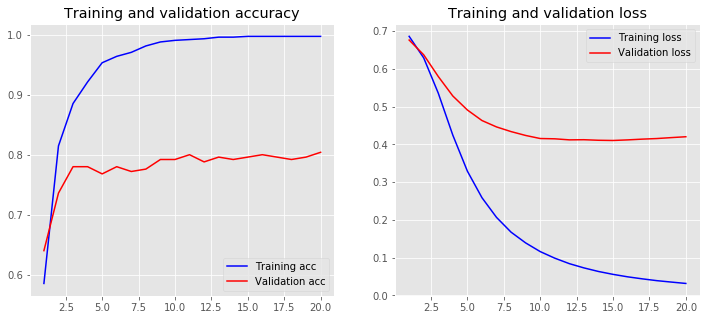

In [10]:
util.plot_history(history)

In [ ]:
# for learning: typically we have some validation set that we use to pick our best model
# then once found we use that against our test set for papers and such
# as you can see the best accuracy is around 20 epochs. So I have retrained the model using 20 epochs
# now we can test our new model against the Amazon and IMDB data sets

In [11]:
for source in df['source'].unique():
    
    df_source = df[df['source'] == source]
    sentences = df_source['sentence'].values
    y = df_source['label'].values
    X =  vectorizer.transform(sentences)
    
    loss, accuracy = model.evaluate(X, y, verbose=False)
    
    print('Accuracy for ',source,' data: ', accuracy)

Accuracy for  yelp  data:  0.949
Accuracy for  amazon  data:  0.744
Accuracy for  imdb  data:  0.7112299465240641


In [ ]:
# as you can see our IMDB accuracy increased by about 5%. Otherwise our results are very similar.